In [1]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
import pickle

Using TensorFlow backend.


In [2]:

def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    elif epoch > 100:
        lrate = 0.0003        
    return lrate

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [4]:
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)


In [5]:

num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [6]:

weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [7]:
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

In [8]:
#training


In [9]:
#training
batch_size = 64
epochs=25
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
hist1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // (batch_size),epochs=3*epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep75.h5')

opt_rms = keras.optimizers.rmsprop(lr=0.0005,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
hist2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep100.h5')

opt_rms = keras.optimizers.rmsprop(lr=0.0003,decay=1e-6)
model.compile(loss='categorical_crossentropy',
        optimizer=opt_rms,
        metrics=['accuracy'])
hist3 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
model.save_weights('cifar10_normal_rms_ep125.h5')




Epoch 1/75
781/781 [==============================] - 179s 229ms/step - loss: 1.9267 - acc: 0.4207 - val_loss: 1.3552 - val_acc: 0.5679
Epoch 2/75
781/781 [==============================] - 178s 228ms/step - loss: 1.2956 - acc: 0.5814 - val_loss: 1.4557 - val_acc: 0.5905
Epoch 3/75
781/781 [==============================] - 179s 229ms/step - loss: 1.0922 - acc: 0.6548 - val_loss: 0.9074 - val_acc: 0.7138
Epoch 4/75
781/781 [==============================] - 179s 229ms/step - loss: 0.9803 - acc: 0.6906 - val_loss: 0.9203 - val_acc: 0.7268
Epoch 5/75
781/781 [==============================] - 179s 229ms/step - loss: 0.9124 - acc: 0.7164 - val_loss: 0.8190 - val_acc: 0.7545
Epoch 6/75
781/781 [==============================] - 179s 229ms/step - loss: 0.8705 - acc: 0.7314 - val_loss: 0.7883 - val_acc: 0.7665
Epoch 7/75
781/781 [==============================] - 179s 229ms/step - loss: 0.8359 - acc: 0.7476 - val_loss: 0.8253 - val_acc: 0.7659
Epoch 8/75
781/781 [============================

Epoch 61/75
781/781 [==============================] - 176s 225ms/step - loss: 0.5841 - acc: 0.8514 - val_loss: 0.5876 - val_acc: 0.8561
Epoch 62/75
781/781 [==============================] - 177s 226ms/step - loss: 0.5838 - acc: 0.8521 - val_loss: 0.5769 - val_acc: 0.8618
Epoch 63/75
781/781 [==============================] - 177s 227ms/step - loss: 0.5946 - acc: 0.8480 - val_loss: 0.6494 - val_acc: 0.8441
Epoch 64/75
781/781 [==============================] - 177s 227ms/step - loss: 0.5819 - acc: 0.8525 - val_loss: 0.5922 - val_acc: 0.8560
Epoch 65/75
781/781 [==============================] - 177s 226ms/step - loss: 0.5832 - acc: 0.8516 - val_loss: 0.5991 - val_acc: 0.8573
Epoch 66/75
781/781 [==============================] - 177s 227ms/step - loss: 0.5836 - acc: 0.8518 - val_loss: 0.5849 - val_acc: 0.8608
Epoch 67/75
781/781 [==============================] - 179s 230ms/step - loss: 0.5857 - acc: 0.8537 - val_loss: 0.6912 - val_acc: 0.8346
Epoch 68/75
781/781 [====================

Epoch 21/25
781/781 [==============================] - 176s 226ms/step - loss: 0.4011 - acc: 0.8970 - val_loss: 0.4594 - val_acc: 0.8880
Epoch 22/25
781/781 [==============================] - 176s 225ms/step - loss: 0.4062 - acc: 0.8950 - val_loss: 0.4697 - val_acc: 0.8826
Epoch 23/25
781/781 [==============================] - 176s 226ms/step - loss: 0.4016 - acc: 0.8957 - val_loss: 0.4563 - val_acc: 0.8896
Epoch 24/25
781/781 [==============================] - 176s 225ms/step - loss: 0.4024 - acc: 0.8959 - val_loss: 0.4501 - val_acc: 0.8871
Epoch 25/25
781/781 [==============================] - 177s 226ms/step - loss: 0.3994 - acc: 0.8954 - val_loss: 0.4868 - val_acc: 0.8807


In [10]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model.h5')    

#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 13s 1ms/step

Test result: 88.070 loss: 0.487


In [18]:
top_layer = model.layers[0]
top_layer

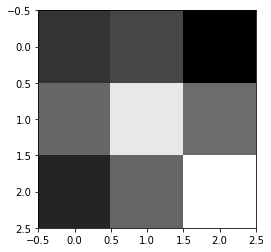

In [19]:
import matplotlib.pyplot as plt
plt.imshow(top_layer.get_weights()[0][2:, :, :, 30].squeeze(), cmap='gray')

In [20]:
history = model.history

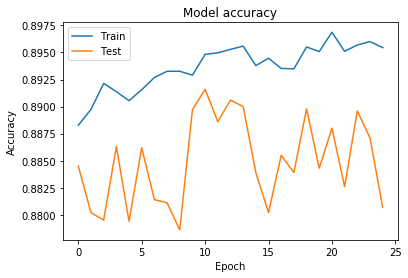

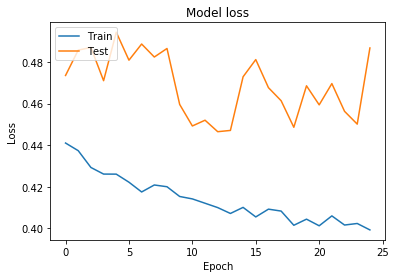

In [21]:
import matplotlib.pyplot as plt
# 绘制训练 & 验证的准确率值
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 绘制训练 & 验证的损失值
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
